In [1]:
import numpy as np
import pandas as pd
pd.options.mode.chained_assignment = None

In [2]:
#Use the PRS dataset to create a dataframe
df=pd.read_csv(r'C:\Users\KIIT\Downloads\Final.csv')


In [3]:
#Check the description of the dataframe
df.describe()

,CUSTOMER_ORDER_ID,SALES_ORG,COMPANY_CODE,ORDER_CREATION_DATE,ORDER_CREATION_TIME,SOLD_TO_PARTY,REQUESTED_DELIVERY_DATE,CREDIT_STATUS,CUSTOMER_NUMBER
count,1.101925e+06,1.101925e+06,1.101925e+06,1.101925e+06,1.101925e+06,1.101925e+06,1.101925e+06,219478.000000,1.101925e+06
mean,8.763187e+08,3.304891e+03,3.431364e+03,2.022032e+07,1.340316e+05,8.763265e+08,2.022035e+07,74.464771,1.074092e+09
std,7.088594e+07,6.958920e+02,5.483805e+02,1.426756e+02,6.503618e+04,7.090306e+07,1.751912e+03,14.444210,4.042693e+08
min,7.534520e+08,2.100000e+03,5.900000e+01,2.022010e+07,0.000000e+00,7.534518e+08,2.019081e+07,52.000000,1.210001e+07
25%,8.149522e+08,2.702000e+03,3.260000e+03,2.022021e+07,8.170200e+04,8.148366e+08,2.022022e+07,64.000000,1.230006e+09
50%,8.763963e+08,3.305000e+03,3.660000e+03,2.022032e+07,1.509540e+05,8.763542e+08,2.022033e+07,64.000000,1.230014e+09
75%,9.376832e+08,3.908000e+03,3.670000e+03,2.022042e+07,1.853580e+05,9.377293e+08,2.022050e+07,93.000000,1.230014e+09
max,9.990063e+08,4.510000e+03,4.260000e+03,2.022060e+07,2.359590e+05,9.990075e+08,2.202022e+07,93.000000,1.230025e+09


In [4]:
#Check the shape of the dataframe
df.shape

(1101925, 16)

In [5]:
#Check the data frame informations
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1101925 entries, 0 to 1101924
Data columns (total 16 columns):
 #   Column                   Non-Null Count    Dtype  
---  ------                   --------------    -----  
 0   CUSTOMER_ORDER_ID        1101925 non-null  int64  
 1   SALES_ORG                1101925 non-null  int64  
 2   DISTRIBUTION_CHANNEL     1101925 non-null  object 
 3   DIVISION                 1101925 non-null  object 
 4   RELEASED_CREDIT_VALUE    1101925 non-null  object 
 5   PURCHASE_ORDER_TYPE      1083233 non-null  object 
 6   COMPANY_CODE             1101925 non-null  int64  
 7   ORDER_CREATION_DATE      1101925 non-null  int64  
 8   ORDER_CREATION_TIME      1101925 non-null  int64  
 9   CREDIT_CONTROL_AREA      1101925 non-null  object 
 10  SOLD_TO_PARTY            1101925 non-null  int64  
 11  ORDER_AMOUNT             1101925 non-null  object 
 12  REQUESTED_DELIVERY_DATE  1101925 non-null  int64  
 13  ORDER_CURRENCY           1101925 non-null 

In [6]:
#Check for the Null values in the dataframe
df.isnull().sum()

CUSTOMER_ORDER_ID               0
SALES_ORG                       0
DISTRIBUTION_CHANNEL            0
DIVISION                        0
RELEASED_CREDIT_VALUE           0
PURCHASE_ORDER_TYPE         18692
COMPANY_CODE                    0
ORDER_CREATION_DATE             0
ORDER_CREATION_TIME             0
CREDIT_CONTROL_AREA             0
SOLD_TO_PARTY                   0
ORDER_AMOUNT                    0
REQUESTED_DELIVERY_DATE         0
ORDER_CURRENCY                  0
CREDIT_STATUS              882447
CUSTOMER_NUMBER                 0
dtype: int64

In [7]:
#Replace all the null values with "NaN"
df.replace(to_replace=[None, ''], value=np.nan, inplace=True)


In [8]:
#Change the format of date columns - "ORDER_CREATION_DATE" to datetime[64] with the format as "%Y%m%d"
df['ORDER_CREATION_DATE']=pd.to_datetime(df['ORDER_CREATION_DATE'],format='%Y%m%d')


In [9]:
#Do the same activity for the other date field i.e. "REQUESTED_DELIVERY_DATE" to datetime[64] with the format as "%Y%m%d"
df['REQUESTED_DELIVERY_DATE']=pd.to_datetime(df['REQUESTED_DELIVERY_DATE'],format='%Y%m%d')


In [10]:
#Sanity check - Check how many records are having order date greater than the delivery date
print((df['ORDER_CREATION_DATE'] > df['REQUESTED_DELIVERY_DATE']).sum())

27142


In [11]:
#Remove those records where order date is greater than the delivery date 
df=df[df['ORDER_CREATION_DATE']<=df['REQUESTED_DELIVERY_DATE']]

In [12]:
#Check the number of records where the “ORDER_AMOUNT” field is having “-” in it.
y=df['ORDER_AMOUNT'].str.contains('-', na=False).sum()
print(y)

32


In [13]:
#Replace “-” with “” from the “ORDER_AMOUNT” field. 
df['ORDER_AMOUNT']=df['ORDER_AMOUNT'].str.replace('-', '')


In [14]:
#Check the number of records where the “ORDER_AMOUNT” field is having “,” in it..
x=df['ORDER_AMOUNT'].str.contains(",", na=False).sum()
print(x)

1073406


In [15]:
#Replace “,” with “.” from the “ORDER_AMOUNT” field. 
df['ORDER_AMOUNT']=df['ORDER_AMOUNT'].str.replace(',', '.')

In [16]:
df['ORDER_AMOUNT']=pd.to_numeric(df['ORDER_AMOUNT'],errors='coerce')

In [17]:
#Count the number of records where the order date and the delivery date are same
print((df['ORDER_CREATION_DATE']==df['REQUESTED_DELIVERY_DATE']).sum())

100437


In [18]:
#Count the number of records for each currency type by using the field “'ORDER_CURRENCY'”
df['ORDER_CURRENCY'].value_counts()

USD    622835
EUR    253196
AUD     64200
CAD     55065
GBP     22028
MYR     13946
PLN     11861
AED      7852
HKD      6198
CHF      5259
RON      4731
SGD      3909
CZK      2178
HU1      1377
NZD        79
BHD        32
SAR        14
QAR        12
KWD         7
SEK         4
Name: ORDER_CURRENCY, dtype: int64

In [19]:
#Create a new column in the existing dataframe as “'amount_in_usd'” and convert all the non-USD currencies in USD and store them in the same column. 
rateconv={
    'USD': 1.0,
    'EUR': 1.08,
    'AED': 0.66,
    'CAD': 0.74,
    'GBP': 1.24,
    'MYR': 0.22,
    'PLN': 0.24,
    'HKD': 0.13,
    'CHF': 1.11,
    'RON': 0.22,
    'SGD': 0.74,
    'CZK': 0.046,
    'HUF': 0.0028,
    'NZD': 0.61,
    'BHD': 2.65,
    'SAR': 0.27,
    'QAR': 0.27,
    'KWD': 3.25,
    'SEK': 0.094
}

df['ORDER_AMOUNT']=pd.to_numeric(df['ORDER_AMOUNT'], errors='coerce')

def usdconv(row):
    if pd.notnull(row['ORDER_AMOUNT']):
        return row['ORDER_AMOUNT'] * rateconv.get(row['ORDER_CURRENCY'], 0) 

df['amount_in_usd']=df.apply(usdconv, axis=1)


In [20]:
#Check for values “0” in the “'amount_in_usd” column. 
print(df[df['amount_in_usd'] == 0].shape[0])

301881


In [21]:
#Create a new column in the existing dataframe “unique_cust_id” by adding 'CUSTOMER_NUMBER' and 'COMPANY_CODE'
df['unique_cust_id'] = df['CUSTOMER_NUMBER'].astype(str) + df['COMPANY_CODE'].astype(str)


In [22]:
import matplotlib.pyplot as plt

In [23]:
import seaborn as sns

(array([    0.,  2000.,  4000.,  6000.,  8000., 10000.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

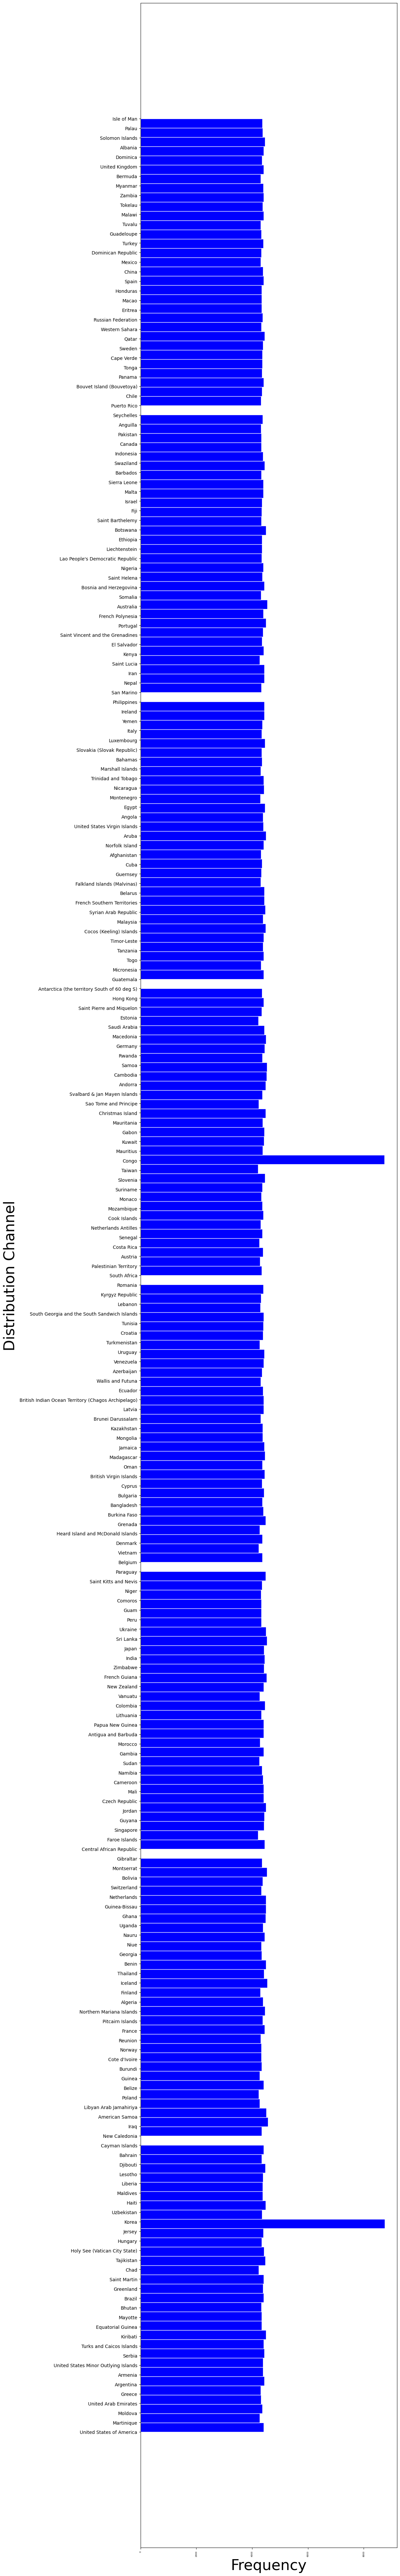

In [24]:
#Create a Histogram on DISTRIBUTION_CHANNEL
plt.subplots(figsize=(10,100))
plt.hist(df['DISTRIBUTION_CHANNEL'],bins=250,facecolor='blue',edgecolor='white',orientation=u'horizontal')
plt.xlabel('Frequency',fontsize=32)
plt.ylabel('Distribution Channel',fontsize=32)
plt.xticks(fontsize=5,rotation=90)
#plt.show()

(-1.1118979085387364,
 1.1286186399772764,
 -1.1060622238974371,
 1.1002886773284495)

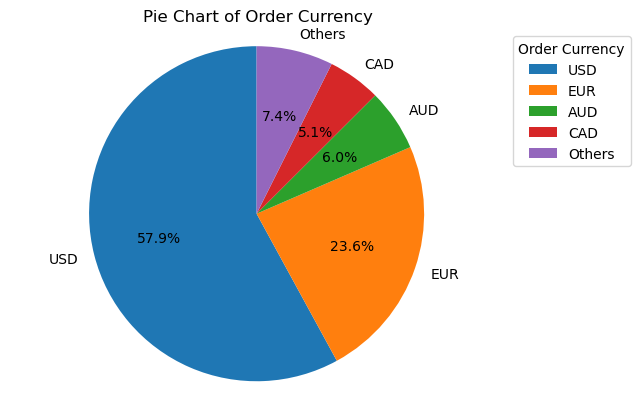

In [25]:
#Create a Pie Chart on ORDER_CURRENCY
order = df['ORDER_CURRENCY'].value_counts()
threshold = 0.05
small_currencies = order[order/sum(order) < threshold]
order = order.drop(small_currencies.index)
order['Others'] = sum(small_currencies)
plt.pie(order, labels=order.index, autopct='%1.1f%%', startangle=90)
plt.title('Pie Chart of Order Currency')
plt.legend(title='Order Currency', loc="upper left", bbox_to_anchor=(1, 0, 0.5, 1))
plt.axis('equal')
#plt.show()

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39,
  40,
  41,
  42,
  43,
  44,
  45,
  46,
  47,
  48,
  49,
  50,
  51,
  52,
  53,
  54,
  55,
  56,
  57,
  58,
  59,
  60,
  61,
  62,
  63,
  64,
  65,
  66,
  67,
  68,
  69,
  70,
  71,
  72,
  73,
  74,
  75,
  76,
  77,
  78,
  79,
  80,
  81,
  82,
  83,
  84,
  85,
  86,
  87,
  88,
  89,
  90,
  91,
  92,
  93,
  94,
  95,
  96,
  97,
  98,
  99,
  100,
  101,
  102,
  103,
  104,
  105,
  106,
  107,
  108,
  109,
  110,
  111,
  112,
  113,
  114,
  115,
  116,
  117,
  118,
  119,
  120,
  121,
  122,
  123,
  124,
  125,
  126,
  127,
  128,
  129,
  130,
  131,
  132,
  133,
  134,
  135,
  136,
  137,
  138,
  139,
  140,
  141,
  142,
  143,
  144,
  145,
  146,
  147,
  148,
  149,
  150,
  151,
  152,
  153,
  154,
  155,
  156,
  157,
  15

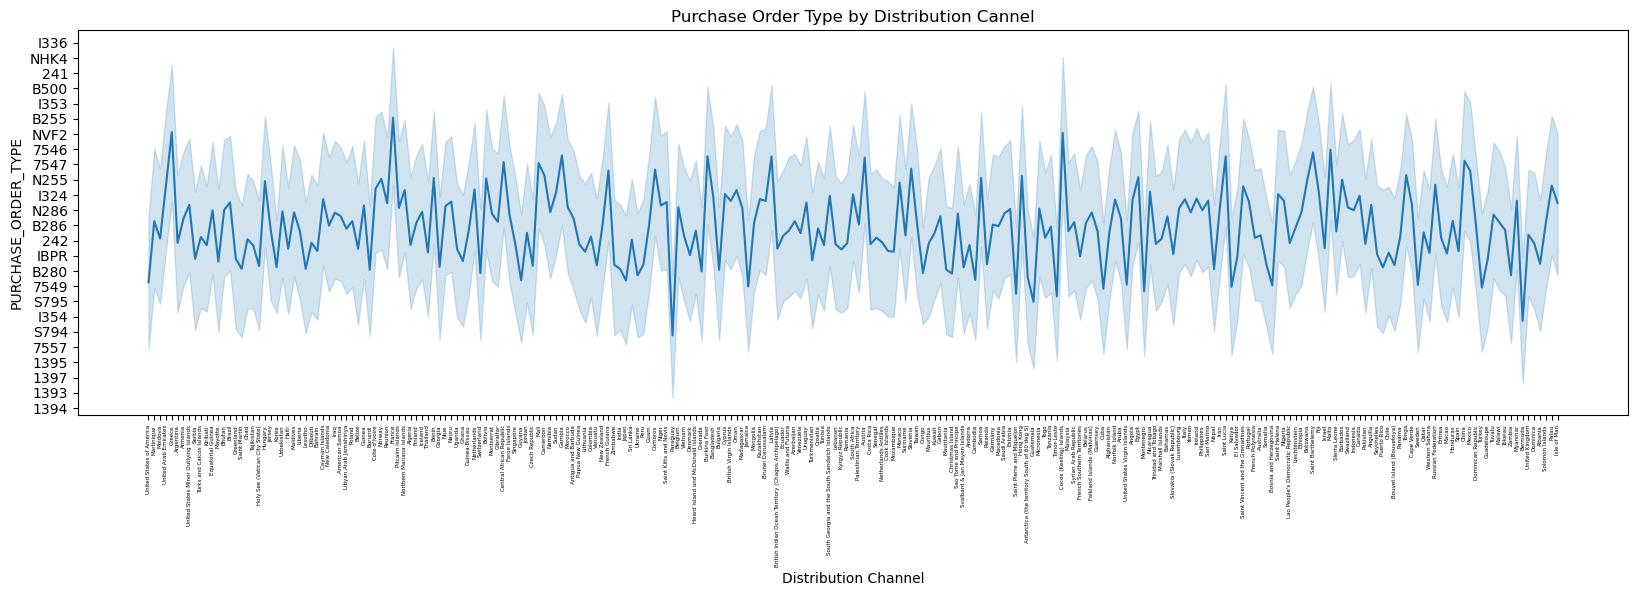

In [26]:
#Create a line chart PURCHASE_ORDER_TYPE and DISTRIBUTION_CHANNEL
plt.figure(figsize=(20,5))
sns.lineplot(data=df, x=df["DISTRIBUTION_CHANNEL"], y=df["PURCHASE_ORDER_TYPE"])
plt.title("Purchase Order Type")
plt.xlabel("Distribution Channel")
plt.title("Purchase Order Type by Distribution Cannel")
plt.xticks(rotation=90,fontsize=4)
#plt.show()

Text(0.5, 1.0, 'amount in usd by order creation date')

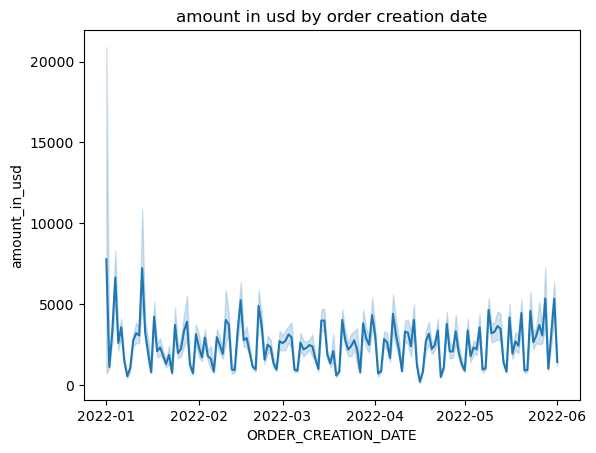

In [27]:
#Create a line plot on ORDER_CREATION_DATE and amount_in_usd
sns.lineplot(x=df['ORDER_CREATION_DATE'],y=df['amount_in_usd'],data=df)
plt.title("amount in usd by order creation date")
#plt.show()

Text(0.5, 1.0, 'Boxplot of Order Amount by Currency')

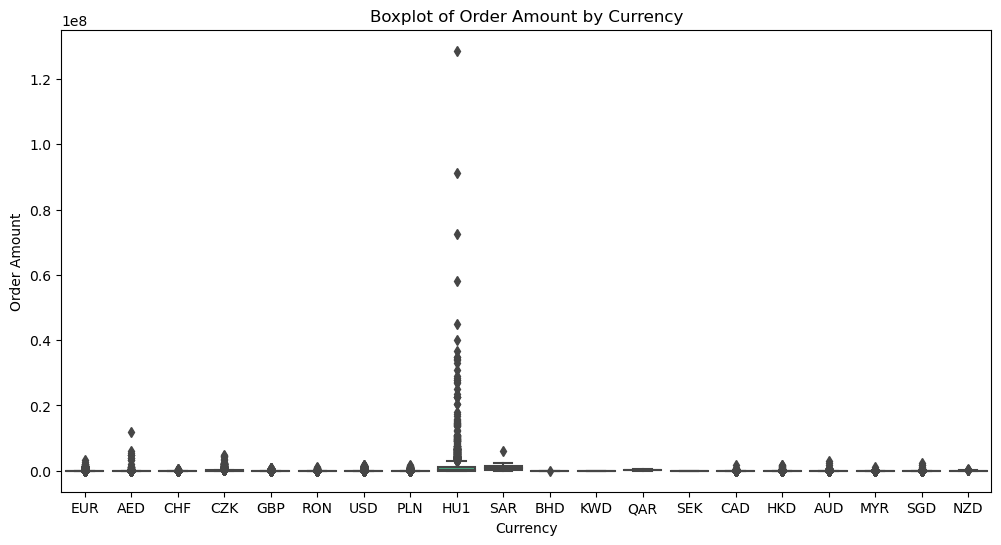

In [28]:
#Create a boxplot on ORDER_AMOUNT to find out the outliers
df = df[pd.to_numeric(df['ORDER_AMOUNT'], errors='coerce').notnull()]
df['ORDER_AMOUNT'] = pd.to_numeric(df['ORDER_AMOUNT'])
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='ORDER_CURRENCY', y='ORDER_AMOUNT')
plt.xlabel('Currency')
plt.ylabel('Order Amount')
plt.title('Boxplot of Order Amount by Currency')
#plt.show()

Text(0.5, 1.0, 'Order Amount by Company Code')

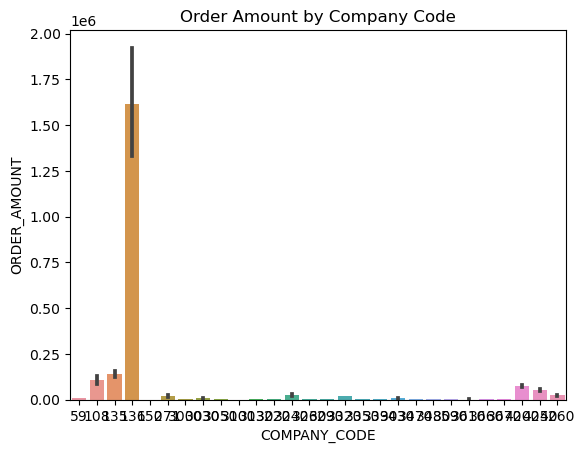

In [29]:
#Create a barchart on COMPANY_CODE and ORDER_AMOUNT
sns.barplot(x=df['COMPANY_CODE'],y=df['ORDER_AMOUNT'],data=df)
plt.title('Order Amount by Company Code')
#plt.show()

In [30]:
import sklearn
from sklearn.feature_selection import SelectKBest
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

from sklearn.preprocessing import FunctionTransformer
from sklearn.compose import ColumnTransformer


In [31]:

amount_median = df['amount_in_usd'].median()

# Calculate the IQR of the "AMOUNT_IN_USD" column
q1 = df['amount_in_usd'].quantile(0.25)
q3 = df['amount_in_usd'].quantile(0.75)
iqr = q3 - q1

# Define the lower and upper bounds for outliers
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr

# Replace outliers with the mode value
df['amount_in_usd'] = df['amount_in_usd'].apply(lambda x: amount_median if x < lower_bound or x > upper_bound else x)

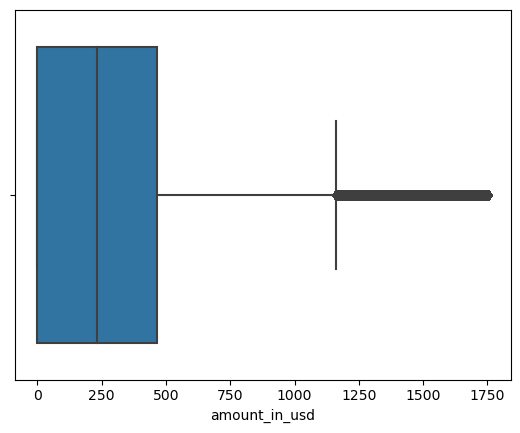

In [32]:
sns.boxplot(x=df['amount_in_usd'])
plt.show()


In [33]:
#Label encoding or One hot Encoding on all the categorical columns
categorical = []
continuous = []

for col in df.columns:
    if df[col].dtype == 'object':
        categorical.append(col)
    else:
        continuous.append(col)
le = LabelEncoder()
# oneHot = OneHotEncoder()

for col in categorical:
    df[col] = le.fit_transform(df[col])
    # df[col] = oneHot.fit_transform(df[col])


In [34]:
columns_to_transform = ['ORDER_AMOUNT', 'amount_in_usd']

# Add a small constant value to zero values
small_constant = 1e-8
df[columns_to_transform] = np.log(df[columns_to_transform] + small_constant)

# Print the updated DataFrame
df

,CUSTOMER_ORDER_ID,SALES_ORG,DISTRIBUTION_CHANNEL,DIVISION,RELEASED_CREDIT_VALUE,PURCHASE_ORDER_TYPE,COMPANY_CODE,ORDER_CREATION_DATE,ORDER_CREATION_TIME,CREDIT_CONTROL_AREA,SOLD_TO_PARTY,ORDER_AMOUNT,REQUESTED_DELIVERY_DATE,ORDER_CURRENCY,CREDIT_STATUS,CUSTOMER_NUMBER,amount_in_usd,unique_cust_id
0,946851639,3537,232,1,1,0,3220,2022-01-01,43012,5,756141537,6.861303,2022-01-13,6,NaN,12311807,6.938264,6608
1,963432061,3449,135,1,1,0,3220,2022-01-01,43114,2,798847812,6.668686,2022-01-11,6,NaN,12311807,6.745647,6608
2,971991639,3238,141,1,43496,204,3260,2022-01-01,110019,0,960984659,11.119786,2022-01-12,6,93.0,12118758,5.445271,4405
3,754349803,3911,228,1,7852,255,3290,2022-01-01,153013,5,925857642,7.248177,2022-01-06,6,93.0,1210499770,7.325138,4059
4,930253442,2381,82,1,1,255,3290,2022-01-01,160020,4,947942786,-18.420681,2022-01-06,6,64.0,1210351400,-18.420681,2919
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1101920,853605710,2498,79,1,1,350,4260,2022-06-01,74357,1,946056501,8.392806,2022-06-01,18,NaN,1210331804,5.445271,2782
1101921,998890898,4509,10,1,1,350,4260,2022-06-01,84052,3,894775488,-18.420681,2022-06-01,18,NaN,1210331804,-18.420681,2782
1101922,983330221,3951,151,1,1,350,4260,2022-06-01,85322,0,909729781,-18.420681,2022-06-01,18,NaN,1210331811,-18.420681,2784
1101923,926668029,3235,167,1,1,350,4260,2022-06-01,90538,7,940836817,-18.420681,2022-06-01,18,NaN,1210331811,-18.420681,2784


In [35]:
grouped_df = df.groupby('SALES_ORG').agg({
    'ORDER_AMOUNT': ['mean'],
    'RELEASED_CREDIT_VALUE': ['sum'],
    'CUSTOMER_NUMBER': ['nunique'],
    'amount_in_usd': ['max']
}).reset_index()

grouped_df.columns = ['SALES_ORG', 'avg_order_amount', 'total_credit_value', 'unique_customers', 'max_amount_usd']


In [36]:
grouped_df



,SALES_ORG,avg_order_amount,total_credit_value,unique_customers,max_amount_usd
0,2100,-0.499566,609429,141,7.460565
1,2101,0.377390,723167,129,7.466408
2,2102,0.410255,594668,116,7.459535
3,2103,0.382793,667986,124,7.458878
4,2104,0.003778,806552,137,7.434772
...,...,...,...,...,...
2406,4506,0.779161,613023,143,7.466605
2407,4507,0.778659,620833,122,7.468091
2408,4508,0.147677,775251,139,7.444254
2409,4509,0.589673,487248,146,7.460950


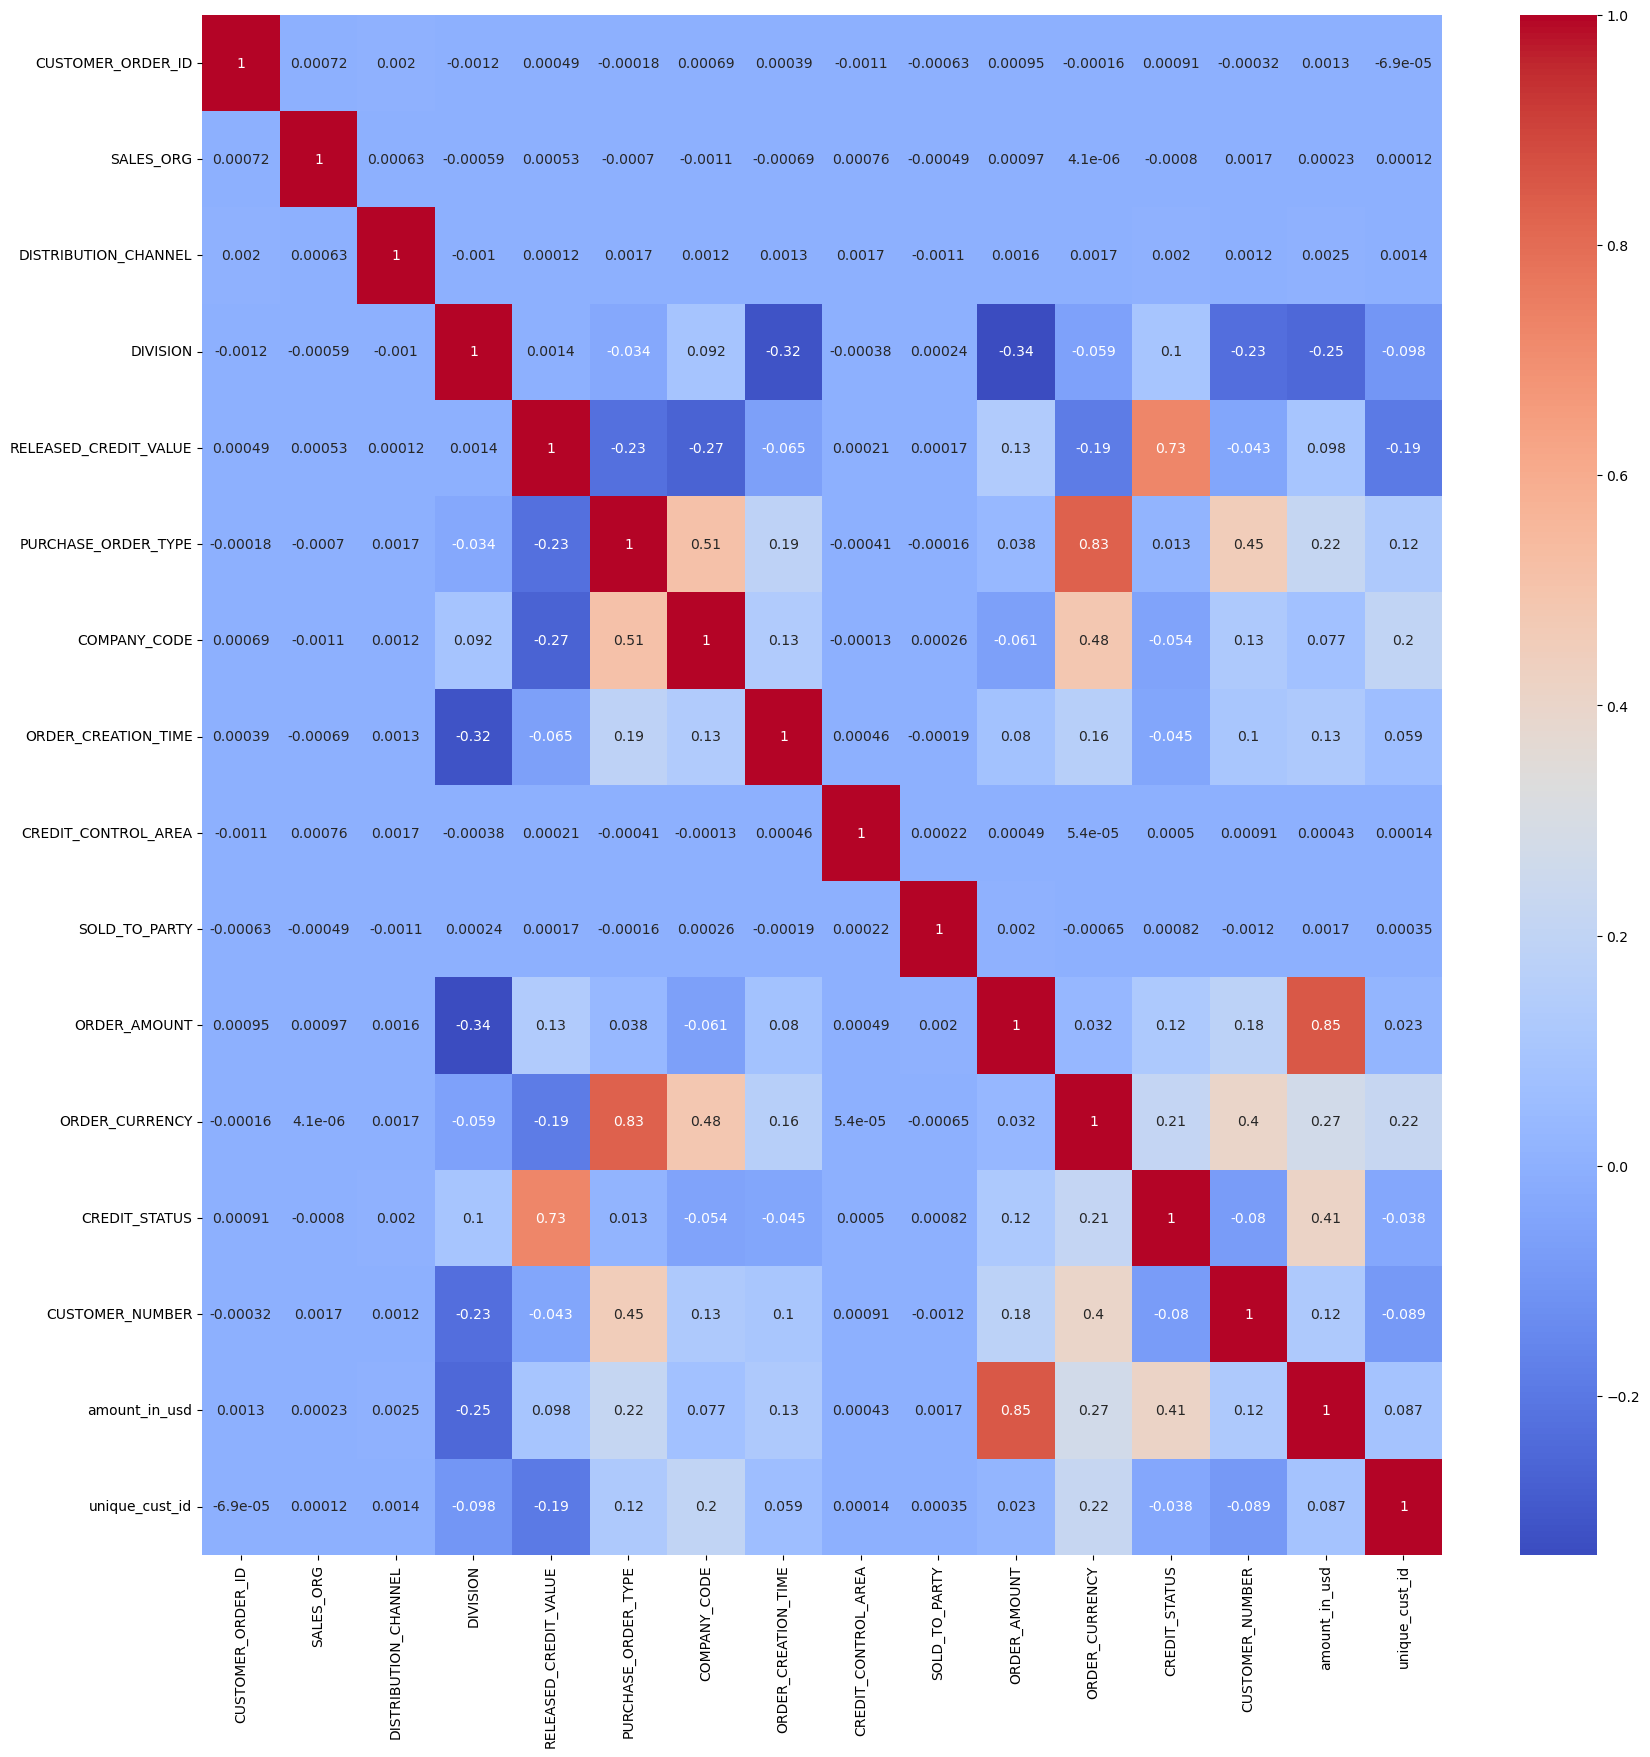

In [37]:
plt.figure(figsize=(20, 20))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.show()


In [38]:
def difference_in_days(melt, lags, ffday, customer_id_col, create_date_col, net_amount_col):
    for i in range(ffday, lags+1):
        melt['Last-'+str(i)+'day_Sales'] = melt.groupby([customer_id_col])[net_amount_col].shift(i)
    return melt

In [39]:
df_temp=difference_in_days(df.drop(['PURCHASE_ORDER_TYPE'],axis=1),10,1,'CUSTOMER_NUMBER','ORDER_CREATION_DATE','amount_in_usd')
for i in range(1,11):
    df_temp['Last-'+str(i)+'day_Sales']=df_temp['Last-'+str(i)+'day_Sales'].fillna(0)

In [40]:
df_temp['RELEASED_CREDIT_VALUE']

0              1
1              1
2          43496
3           7852
4              1
           ...  
1101920        1
1101921        1
1101922        1
1101923        1
1101924        1
Name: RELEASED_CREDIT_VALUE, Length: 1074783, dtype: int32

In [41]:
df_temp['RELEASED_CREDIT_VALUE']=df_temp['RELEASED_CREDIT_VALUE'].replace(to_replace='-',value='',regex=True)
df_temp['RELEASED_CREDIT_VALUE']=df_temp['RELEASED_CREDIT_VALUE'].replace(to_replace=',',value='.',regex=True)
df_temp['RELEASED_CREDIT_VALUE']=df_temp['RELEASED_CREDIT_VALUE'].astype(float)

<AxesSubplot:>

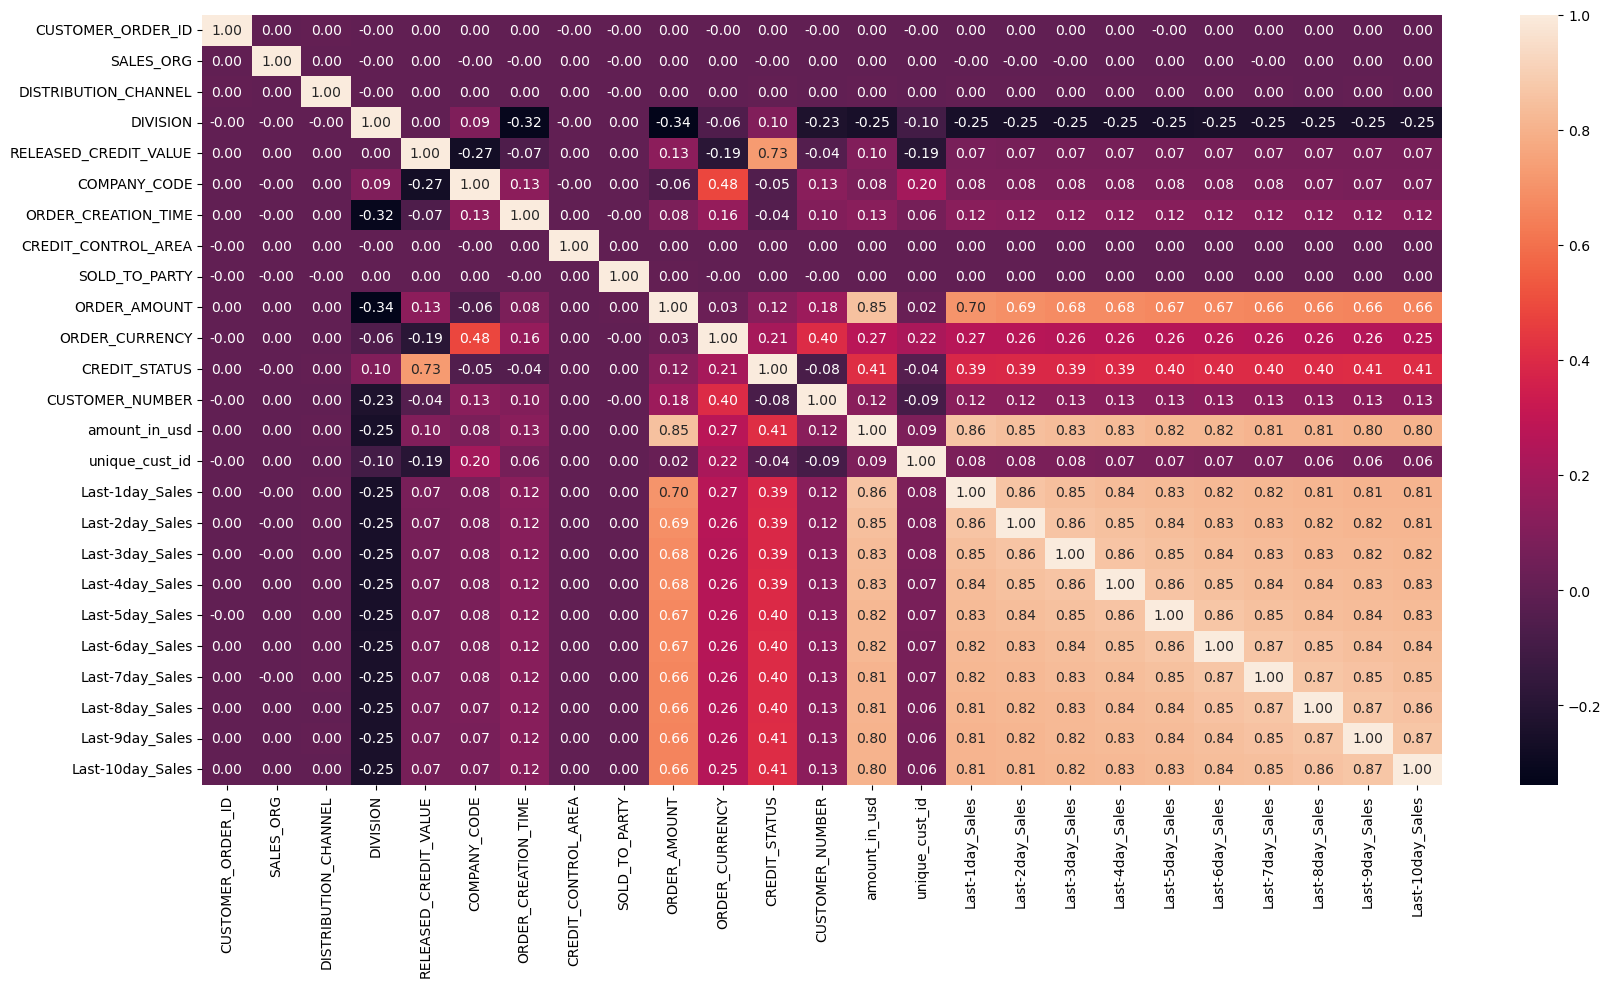

In [42]:
plt.figure(figsize=(20,10))
sns.heatmap(df_temp.corr(),annot=True,fmt='.2f')

In [43]:
df_final=df_temp[['Last-10day_Sales','Last-9day_Sales','Last-8day_Sales','Last-7day_Sales','Last-6day_Sales','Last-5day_Sales','Last-4day_Sales','Last-3day_Sales','Last-2day_Sales','Last-1day_Sales','amount_in_usd']]
df_final.head()

,Last-10day_Sales,Last-9day_Sales,Last-8day_Sales,Last-7day_Sales,Last-6day_Sales,Last-5day_Sales,Last-4day_Sales,Last-3day_Sales,Last-2day_Sales,Last-1day_Sales,amount_in_usd
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,6.938264
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.938264,6.745647
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,5.445271
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,7.325138
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,-18.420681


<AxesSubplot:>

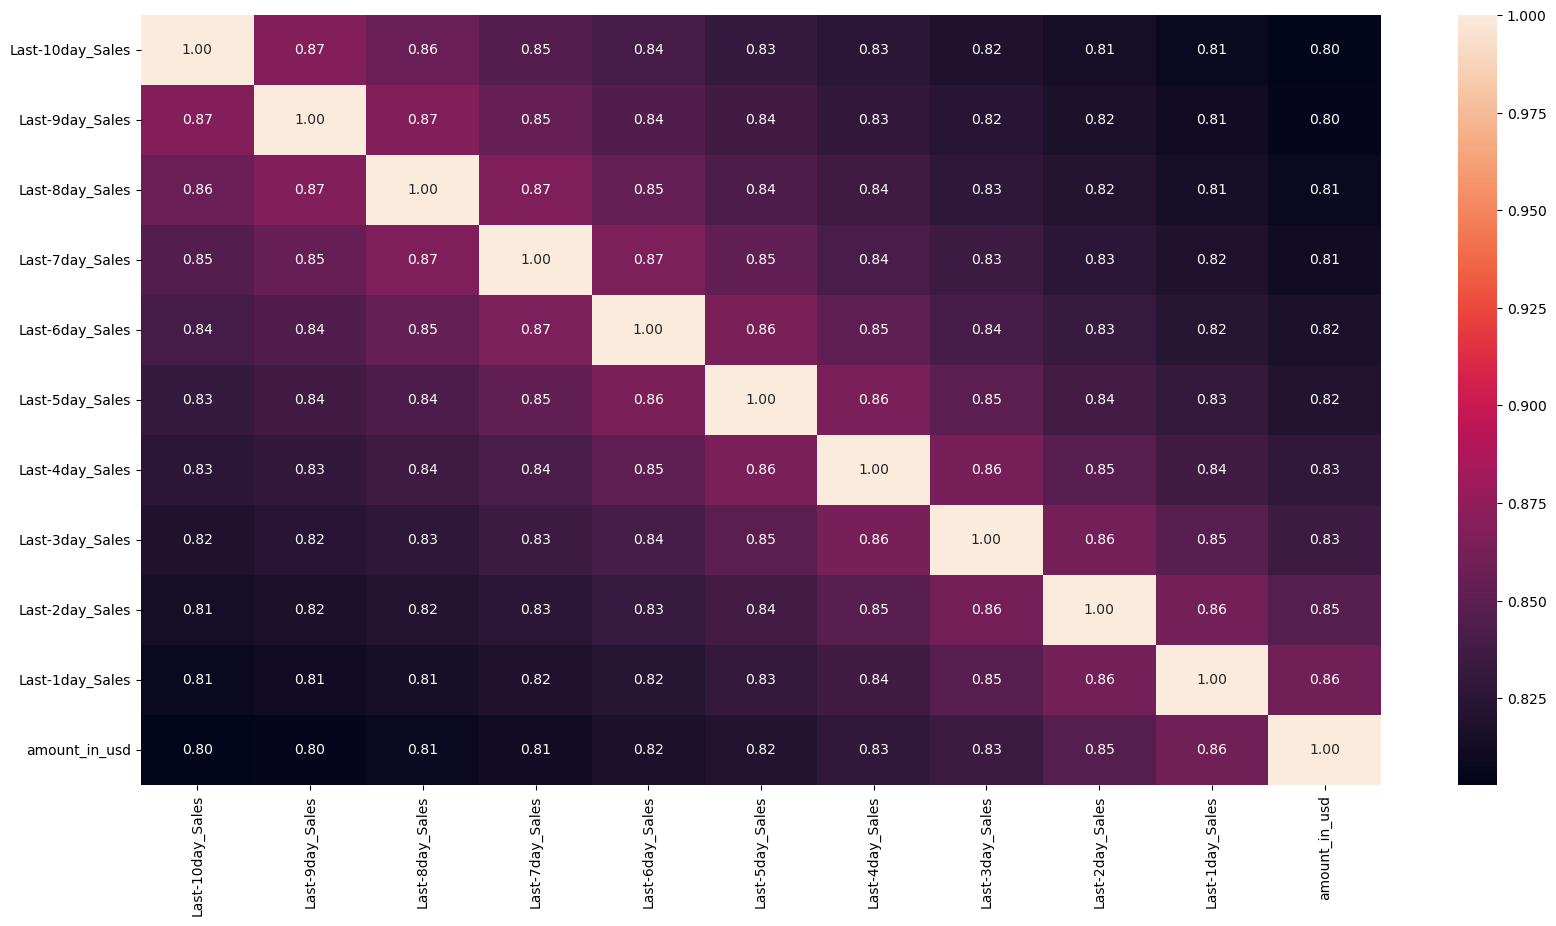

In [44]:
plt.figure(figsize=(20,10))
sns.heatmap(df_final.corr(),annot=True,fmt='.2f')

In [45]:
corr_matrix=df.corr().abs()
high_var=np.where(corr_matrix>0.7)
high_corr=[(corr_matrix.columns[x],corr_matrix.columns[y]) for x,y in zip(*high_var) if x!=y and x<y]
print(high_corr)


[('RELEASED_CREDIT_VALUE', 'CREDIT_STATUS'), ('PURCHASE_ORDER_TYPE', 'ORDER_CURRENCY'), ('ORDER_AMOUNT', 'amount_in_usd')]


In [46]:
from sklearn import tree
from sklearn import datasets
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1074783 entries, 0 to 1101924
Data columns (total 18 columns):
 #   Column                   Non-Null Count    Dtype         
---  ------                   --------------    -----         
 0   CUSTOMER_ORDER_ID        1074783 non-null  int64         
 1   SALES_ORG                1074783 non-null  int64         
 2   DISTRIBUTION_CHANNEL     1074783 non-null  int32         
 3   DIVISION                 1074783 non-null  int32         
 4   RELEASED_CREDIT_VALUE    1074783 non-null  int32         
 5   PURCHASE_ORDER_TYPE      1074783 non-null  int32         
 6   COMPANY_CODE             1074783 non-null  int64         
 7   ORDER_CREATION_DATE      1074783 non-null  datetime64[ns]
 8   ORDER_CREATION_TIME      1074783 non-null  int64         
 9   CREDIT_CONTROL_AREA      1074783 non-null  int32         
 10  SOLD_TO_PARTY            1074783 non-null  int64         
 11  ORDER_AMOUNT             1074783 non-null  float64       
 12  

In [48]:
import sklearn
from sklearn.preprocessing import *
from sklearn.model_selection import train_test_split
from sklearn.metrics import *
from sklearn.utils import all_estimators
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, r2_score
from sklearn.model_selection import GridSearchCV

%matplotlib inline

In [49]:
df.isna().sum()

CUSTOMER_ORDER_ID               0
SALES_ORG                       0
DISTRIBUTION_CHANNEL            0
DIVISION                        0
RELEASED_CREDIT_VALUE           0
PURCHASE_ORDER_TYPE             0
COMPANY_CODE                    0
ORDER_CREATION_DATE             0
ORDER_CREATION_TIME             0
CREDIT_CONTROL_AREA             0
SOLD_TO_PARTY                   0
ORDER_AMOUNT                    0
REQUESTED_DELIVERY_DATE         0
ORDER_CURRENCY                  0
CREDIT_STATUS              863456
CUSTOMER_NUMBER                 0
amount_in_usd                   0
unique_cust_id                  0
dtype: int64

In [51]:
df=df.drop(['CREDIT_STATUS'],axis=1)

In [52]:
df.dropna(inplace = True)

X = df[['SALES_ORG','RELEASED_CREDIT_VALUE','PURCHASE_ORDER_TYPE','unique_cust_id','DISTRIBUTION_CHANNEL','DIVISION']]
y = df['amount_in_usd']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 355)

In [53]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1074783 entries, 0 to 1101924
Data columns (total 6 columns):
 #   Column                 Non-Null Count    Dtype
---  ------                 --------------    -----
 0   SALES_ORG              1074783 non-null  int64
 1   RELEASED_CREDIT_VALUE  1074783 non-null  int32
 2   PURCHASE_ORDER_TYPE    1074783 non-null  int32
 3   unique_cust_id         1074783 non-null  int32
 4   DISTRIBUTION_CHANNEL   1074783 non-null  int32
 5   DIVISION               1074783 non-null  int32
dtypes: int32(5), int64(1)
memory usage: 36.9 MB


In [54]:
from sklearn.linear_model import LinearRegression

from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Initialize and train the regression models

linear_regression = LinearRegression()

linear_regression.fit(X_train, y_train) 
# Make predictions on the test data

linear_regression_pred = linear_regression.predict(X_test)

# Evaluate the models
linear_mse = mean_squared_error(y_test, linear_regression_pred)
linear_rmse = mean_squared_error(y_test, linear_regression_pred, squared=False)
linear_mae = mean_absolute_error(y_test, linear_regression_pred)
linear_r2 = r2_score(y_test, linear_regression_pred)

print("Linear Regression: ")

print("MSE:",linear_mse)
print("RMSE:",linear_rmse)
print("MAE:",linear_mae)
print("r2:",linear_r2)

Linear Regression: 
MSE: 101.2837939818989
RMSE: 10.063984995114952
MAE: 8.500970182565416
r2: 0.13558862764132984


In [55]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Initialize and train the Decision Tree model
decision_tree = DecisionTreeRegressor()
decision_tree.fit(X_train, y_train)

# Make predictions on the test data
decision_tree_pred = decision_tree.predict(X_test)

# Evaluate the model
dt_mse = mean_squared_error(y_test, decision_tree_pred)
dt_rmse = mean_squared_error(y_test, decision_tree_pred, squared=False)
dt_mae = mean_absolute_error(y_test, decision_tree_pred)
dt_r2 = r2_score(y_test, decision_tree_pred)

print("Decision Tree:")
print("MSE:", dt_mse)
print("RMSE:", dt_rmse)
print("MAE:", dt_mae)
print("R-squared (R^2):", dt_r2)


Decision Tree:
MSE: 89.39146164829084
RMSE: 9.454705793851591
MAE: 4.261794107685231
R-squared (R^2): 0.23708430536916758


In [56]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Initialize and train the Random Forest model
random_forest = RandomForestRegressor()
random_forest.fit(X_train, y_train)

# Make predictions on the test data
random_forest_pred = random_forest.predict(X_test)

# Evaluate the model
rf_mse = mean_squared_error(y_test, random_forest_pred)
rf_rmse = mean_squared_error(y_test, random_forest_pred, squared=False)
rf_mae = mean_absolute_error(y_test, random_forest_pred)
rf_r2 = r2_score(y_test, random_forest_pred)

print("Random Forest:")
print("MSE:", rf_mse)
print("RMSE:", rf_rmse)
print("MAE:", rf_mae)
print("R-squared (R^2):", rf_r2)

Random Forest:
MSE: 54.98125346119588
RMSE: 7.414934487990833
MAE: 4.038817913815552
R-squared (R^2): 0.5307598689787827


In [57]:
from sklearn.ensemble import AdaBoostRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Initialize and train the AdaBoost model
adaboost = AdaBoostRegressor()
adaboost.fit(X_train, y_train)

# Make predictions on the test data
adaboost_pred = adaboost.predict(X_test)

# Evaluate the model
ab_mse = mean_squared_error(y_test, adaboost_pred)
ab_rmse = mean_squared_error(y_test, adaboost_pred, squared=False)
ab_mae = mean_absolute_error(y_test, adaboost_pred)
ab_r2 = r2_score(y_test, adaboost_pred)

print("AdaBoost:")
print("MSE:", ab_mse)
print("RMSE:", ab_rmse)
print("MAE:", ab_mae)
print("R-squared (R^2):", ab_r2)

AdaBoost:
MSE: 87.01027381458923
RMSE: 9.327929771100832
MAE: 8.161688404152338
R-squared (R^2): 0.25740666655107236


In [58]:
from sklearn.svm import LinearSVR
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Initialize and train the LinearSVR model
linear_svr = LinearSVR()
linear_svr.fit(X_train, y_train)

# Make predictions on the test data
linear_svr_pred = linear_svr.predict(X_test)
# Evaluate the model
svm_mse = mean_squared_error(y_test, linear_svr_pred)
svm_rmse = mean_squared_error(y_test, linear_svr_pred, squared=False)
svm_mae = mean_absolute_error(y_test, linear_svr_pred)
svm_r2 = r2_score(y_test, linear_svr_pred)
print("SVM:")
print("MSE:", svm_mse)
print("RMSE:", svm_rmse)
print("MAE:", svm_mae)
print("R-squared (R^2):", svm_r2)

SVM:
MSE: 142.0425340019862
RMSE: 11.918159841266865
MAE: 8.42991118159593
R-squared (R^2): -0.21226878380862568


C:\Users\KIIT\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


In [59]:
from xgboost import XGBRegressor
xgb_reg = XGBRegressor()
xgb_reg.fit(X_train, y_train)
xgb_pred = xgb_reg.predict(X_test)
xgb_mse = mean_squared_error(y_test, xgb_pred)
xgb_rmse = mean_squared_error(y_test, xgb_pred, squared=False)
xgb_mae = mean_absolute_error(y_test, xgb_pred)
xgb_r2 = r2_score(y_test, xgb_pred)
print("XGBooster:")
print("MSE:", xgb_mse)
print("RMSE:", xgb_rmse)
print("MAE:", xgb_mae)
print("R-squared (R^2):", xgb_r2)

XGBooster:
MSE: 45.88642813405478
RMSE: 6.773952179788013
MAE: 4.091527349812503
R-squared (R^2): 0.60838008968064


In [60]:
print("Linear Regression - MSE:", linear_mse, "R2:", linear_r2,"RMSE:",linear_rmse,"MAE:",linear_mae)
print("Support Vector Machine - MSE:", svm_mse, "R2:", svm_r2,"RMSE:",svm_rmse,"MAE:",svm_mae)
print("Decision Tree - MSE:", dt_mse, "R2:", dt_r2,"RMSE:",dt_rmse,"MAE:",dt_mae)
print("Random Forest - MSE:", rf_mse, "R2:", rf_r2,"RMSE:",rf_rmse,"MAE:",rf_mae)
print("AdaBoost - MSE:", ab_mse, "R2:", ab_r2,"RMSE:",ab_rmse,"MAE:",ab_mae)
print("XGBoost - MSE:", xgb_mse, "R2:", xgb_r2,"RMSE:",xgb_rmse,"MAE:",xgb_mae)

Linear Regression - MSE: 101.2837939818989 R2: 0.13558862764132984 RMSE: 10.063984995114952 MAE: 8.500970182565416
Support Vector Machine - MSE: 142.0425340019862 R2: -0.21226878380862568 RMSE: 11.918159841266865 MAE: 8.42991118159593
Decision Tree - MSE: 89.39146164829084 R2: 0.23708430536916758 RMSE: 9.454705793851591 MAE: 4.261794107685231
Random Forest - MSE: 54.98125346119588 R2: 0.5307598689787827 RMSE: 7.414934487990833 MAE: 4.038817913815552
AdaBoost - MSE: 87.01027381458923 R2: 0.25740666655107236 RMSE: 9.327929771100832 MAE: 8.161688404152338
XGBoost - MSE: 45.88642813405478 R2: 0.60838008968064 RMSE: 6.773952179788013 MAE: 4.091527349812503


In [61]:
mae_scores = {
    'Linear Regression': linear_mae,
    'Support Vector Machine': svm_mae,
    'Decision Tree': dt_mae,
    'Random Forest': rf_mae,
    'AdaBoost': ab_mae,
    'XGBoost': xgb_mae
}

# Find the model with the lowest MAE
best_model = min(mae_scores, key=mae_scores.get)
best_mae = mae_scores[best_model]

# Print the best model and its MAE
print("Best Model:",best_model)
print("Best MAE:",best_mae)

Best Model: Random Forest
Best MAE: 4.038817913815552


In [62]:
r2_scores = {
    'Linear Regression': linear_r2,
    'Support Vector Machine': svm_r2,
    'Decision Tree': dt_r2,
    'Random Forest': rf_r2,
    'AdaBoost': ab_r2,
    'XGBoost': xgb_r2
}

# Find the model with the lowest MAE
best_model = max(r2_scores, key=r2_scores.get)
best_r2 = r2_scores[best_model]

# Print the best model and its MAE
print("Best Model:",best_model)
print("Best R2:",best_r2)

Best Model: XGBoost
Best R2: 0.60838008968064


In [63]:
mse_scores = {
    'Linear Regression': linear_mse,
    'Support Vector Machine': svm_mse,
    'Decision Tree': dt_mse,
    'Random Forest': rf_mse,
    'AdaBoost': ab_mse,
    'XGBoost': xgb_mse
}

# Find the model with the lowest MAE
best_model = min(mse_scores, key=mse_scores.get)
best_mse = mse_scores[best_model]

# Print the best model and its MAE
print("Best Model:",best_model)
print("Best MSE:",best_mse)

Best Model: XGBoost
Best MSE: 45.88642813405478


In [64]:
rmse_scores = {
    'Linear Regression': linear_rmse,
    'Support Vector Machine': svm_rmse,
    'Decision Tree': dt_rmse,
    'Random Forest': rf_rmse,
    'AdaBoost': ab_rmse,
    'XGBoost': xgb_rmse
}

# Find the model with the lowest MAE
best_model = min(rmse_scores, key=rmse_scores.get)
best_rmse = rmse_scores[best_model]

# Print the best model and its MAE
print("Best Model:",best_model)
print("Best RMSE:",best_rmse)

Best Model: XGBoost
Best RMSE: 6.773952179788013


In [65]:
# Create arrays of the evaluation metrics
rmse_scores = np.array([linear_rmse, svm_rmse, dt_rmse, rf_rmse, ab_rmse, xgb_rmse])
mse_scores = np.array([linear_mse, svm_mse, dt_mse, rf_mse, ab_mse, xgb_mse])
r2_scores = np.array([linear_r2, svm_r2, dt_r2, rf_r2, ab_r2, xgb_r2])
#mae_scores = np.array([linear_mae, svm_mae, tree_mae, rf_mae, adaboost_mae, xgb_mae])

# Find the index of the best model based on each metric
best_rmse_index = np.argmin(rmse_scores)
best_mse_index = np.argmin(mse_scores)
best_r2_index = np.argmax(r2_scores)
#best_mae_index = np.argmin(mae_scores)

# Check if the indices are the same to determine the best model
if (
    best_rmse_index == best_mse_index and
    best_r2_index == best_rmse_index
):
    best_model_index = best_rmse_index
    best_model = ['Linear Regression', 'Support Vector Machine', 'Decision Tree', 'Random Forest', 'AdaBoost', 'XGBoost'][best_model_index]
    print("Best Model:", best_model)
else:
    print("No single best model based on the individual metrics.")

Best Model: XGBoost


In [66]:
from sklearn.model_selection import GridSearchCV


# Define the parameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.1, 0.01, 0.001],
    'max_depth': [3, 4, 5],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0]
}



# Perform Grid Search with cross-validation
grid_search = GridSearchCV(estimator=xgb_reg, param_grid=param_grid, cv=3, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

# Get the best hyperparameters and model
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

# Train the best model
best_model.fit(X_train, y_train)

# Make predictions and evaluate the model
xgb_predictions = best_model.predict(X_test)
xgb_mse = mean_squared_error(y_test, xgb_predictions)
xgb_r2 = r2_score(y_test, xgb_predictions)
xgb_rmse = np.sqrt(xgb_mse)

print("Best Hyperparameters:",best_params)
print("XGBoost - MSE:",xgb_mse,"R2:",xgb_r2,"RMSE:",xgb_rmse)

Best Hyperparameters: {'colsample_bytree': 1.0, 'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 300, 'subsample': 0.8}
XGBoost - MSE: 46.85711282231997 R2: 0.6000957348937249 RMSE: 6.845225549411792
